In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns

C:\Users\lollo\AppData\Local\Temp\ipykernel_15428\673120910.py:7: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
# import dataset
df = pd.read_csv("dataset-progetto/train.csv", skipinitialspace=True)
df

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.2810,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.3600,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.2620,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.1170,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.2990,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,False,0,Autechre,EP7,0.554,0.657,1,-14.232,...,0.1320,0.0335,117.319,432027,NaN,837.0,212.0,NaN,2.367412,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182746,False,44,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,...,0.1230,0.0016,92.323,182747,3.0,277.0,92.0,NaN,2.367412,sleep
14997,Psychological Attack,400091,False,43,Droplex,Psychological Attack,0.799,0.535,1,-9.103,...,0.0713,0.0708,126.000,400091,4.0,837.0,209.0,NaN,2.367412,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,False,37,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,...,0.4020,0.2700,160.044,197250,4.0,513.0,130.0,NaN,1.279305,breakbeat


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   15000 non-null  object 
 1   duration_ms            15000 non-null  int64  
 2   explicit               15000 non-null  bool   
 3   popularity             15000 non-null  int64  
 4   artists                15000 non-null  object 
 5   album_name             15000 non-null  object 
 6   danceability           15000 non-null  float64
 7   energy                 15000 non-null  float64
 8   key                    15000 non-null  int64  
 9   loudness               15000 non-null  float64
 10  mode                   10550 non-null  float64
 11  speechiness            15000 non-null  float64
 12  acousticness           15000 non-null  float64
 13  instrumentalness       15000 non-null  float64
 14  liveness               15000 non-null  float64
 15  va

In [4]:
df_copy = df.copy()

In [5]:
df_clust = df_copy.drop(['name','explicit', 'artists','album_name','key','mode','features_duration_ms','time_signature','n_beats','n_bars','popularity_confidence','processing','genre'], axis=1)
df_clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_ms       15000 non-null  int64  
 1   popularity        15000 non-null  int64  
 2   danceability      15000 non-null  float64
 3   energy            15000 non-null  float64
 4   loudness          15000 non-null  float64
 5   speechiness       15000 non-null  float64
 6   acousticness      15000 non-null  float64
 7   instrumentalness  15000 non-null  float64
 8   liveness          15000 non-null  float64
 9   valence           15000 non-null  float64
 10  tempo             15000 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 1.3 MB


In [6]:
df_clust_4 = df_clust.drop(['energy','speechiness','acousticness','instrumentalness','liveness','valence','tempo'],  axis=1)
df_clust_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   duration_ms   15000 non-null  int64  
 1   popularity    15000 non-null  int64  
 2   danceability  15000 non-null  float64
 3   loudness      15000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 468.9 KB


In [7]:
scaler = MinMaxScaler()
train_data = scaler.fit_transform(df_clust_4)

In [8]:
from sklearn.metrics import *
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [9]:
%%time
sse_list = []
sil_list = []

for k in range(2, 51):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(train_data)
    sse_list.append(kmeans.inertia_)
    sil_list.append(silhouette_score(train_data, kmeans.labels_))

CPU times: total: 10min 54s
Wall time: 1min 36s


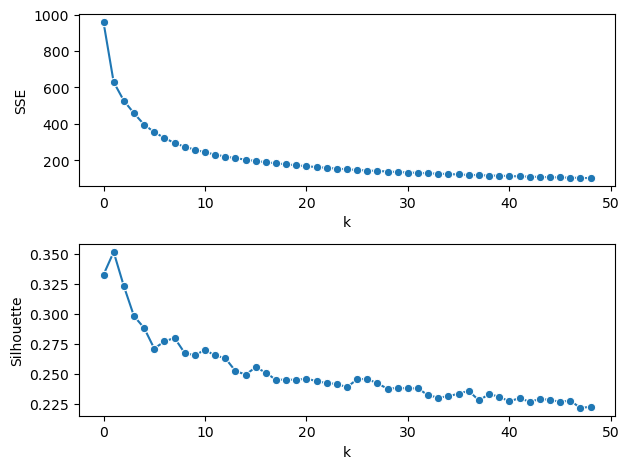

In [10]:
fig, axs = plt.subplots(2) # 1 row, 2 columns

sns.lineplot(x=range(len(sse_list)), y=sse_list, marker='o', ax=axs[0])
axs[0].set(xlabel='k', ylabel='SSE')
sns.lineplot(x=range(len(sil_list)), y=sil_list, marker='o', ax=axs[1])
axs[1].set(xlabel='k', ylabel='Silhouette')

plt.tight_layout() # Adjust the padding between and around subplots

In [11]:
# density based clustering
#eps=0.05 e min_samples=20
print('dbscan')

dbscan = DBSCAN(eps=0.05, min_samples=20, metric='euclidean')
dbscan.fit(train_data)

hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(train_data[dbscan.labels_ != -1], dbscan.labels_[dbscan.labels_ != -1]))

dbscan
labels {-1: 2458, 0: 12422, 1: 68, 2: 52, 3: 0}
silhouette 0.3910066275805186


In [12]:
np.unique(dbscan.labels_, return_counts=True)
#[tutti i clusters trovati], [il numero di records in ogni cluster]

(array([-1,  0,  1,  2], dtype=int64),
 array([ 2458, 12422,    68,    52], dtype=int64))

In [13]:
df_clust_4.columns

Index(['duration_ms', 'popularity', 'danceability', 'loudness'], dtype='object')

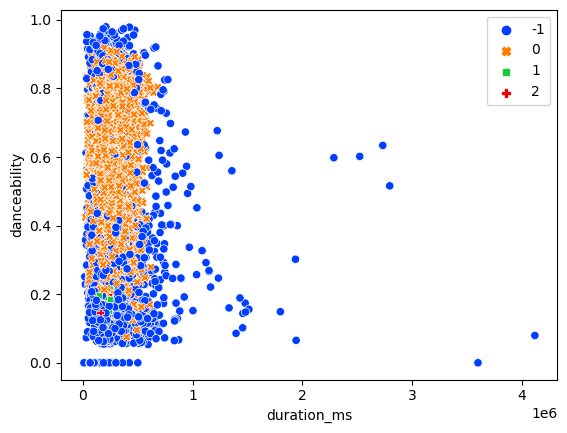

In [14]:
#duration_ms 
#danceability
sns.scatterplot(data=df_clust_4, 
                x="duration_ms", 
                y="danceability", 
                hue=dbscan.labels_, 
                style=dbscan.labels_,
                palette="bright")
plt.show()

In [15]:
#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform

In [16]:
dist = pdist(train_data, 'euclidean')
dist = squareform(dist)

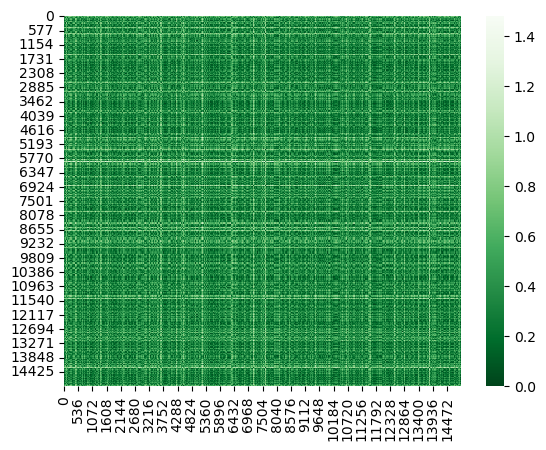

In [17]:
sns.heatmap(dist, cmap="Greens_r", annot=False)
plt.show()

In [18]:
k=4
kth_distances = []

for d in dist:  # d is a vector containing distances between the ith record and all the others
    index_kth_distance = np.argsort(d)[k]  # take the index of the kth nearest neighbor
    kth_distances.append(d[index_kth_distance])  # store the distance in a list

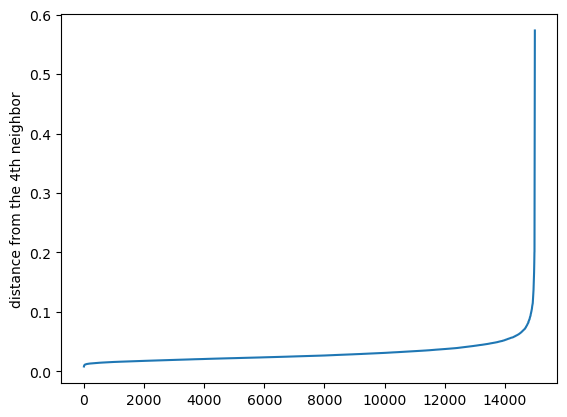

In [19]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('distance from the {}th neighbor'.format(k))
         
plt.show()